<a href="https://colab.research.google.com/github/ACfma/CMEPDA_exam/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract 4**.
*Implement an autoencoder to compress the grey matter image segments obtained from the brain MRIs of a cohort of subjects with Alzheimer’s disease and control subjects. Classify the subjects using the latent space representation. Optimize the dimension of the latent space according to the case/control discrimination performance.*

### **Introduction**

To classifier the AD and CTRL cases we used an SVM method. The input is realized by PCA method to reduce the dimensionality of DATASET.

We used the dataset made available at:

https://drive.google.com/drive/u/1/folders/1KfFF_ww-MW9z1B-pGaa-qBtSpfy-ckUJ

Dataset: Images of the brain MRIs avaible are split in two folder, one (AD_s3) for patients with Alzheimer's disease, and the other one (CTRL_s3) for control subjects. Due to the huge size of the dataset we worked on one or few slices crossing the hippocampus.

### **Reading Data**

After unziping the folder, we divided dataset into two part:

    -dataset_path_AD for patients with Alzheimer's disease;
    -dataset_path_CTRL for control subjects.


In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
dataset_path_AD = '/gdrive/MyDrive/content/AD_s3'
dataset_path_CTRL = '/gdrive/MyDrive/content/CTRL_s3'

In [ ]:
dataset_path_AD

'/gdrive/MyDrive/content/AD_s3'

In [ ]:
dataset_path_CTRL

'/gdrive/MyDrive/content/CTRL_s3'

In [ ]:
!unzip -q /gdrive/MyDrive/cmepda_medphys_dataset/IMAGES/AD_CTRL/CTRL_s3.zip -d /gdrive/MyDrive/content/


In [ ]:
!ls /gdrive/MyDrive/content/AD_s3/

smwc1AD-100.nii  smwc1AD-133.nii  smwc1AD-35.nii  smwc1AD-68.nii
smwc1AD-101.nii  smwc1AD-134.nii  smwc1AD-36.nii  smwc1AD-69.nii
smwc1AD-102.nii  smwc1AD-135.nii  smwc1AD-37.nii  smwc1AD-6.nii
smwc1AD-103.nii  smwc1AD-136.nii  smwc1AD-38.nii  smwc1AD-70.nii
smwc1AD-104.nii  smwc1AD-137.nii  smwc1AD-39.nii  smwc1AD-71.nii
smwc1AD-105.nii  smwc1AD-138.nii  smwc1AD-3.nii   smwc1AD-72.nii
smwc1AD-106.nii  smwc1AD-139.nii  smwc1AD-40.nii  smwc1AD-73.nii
smwc1AD-107.nii  smwc1AD-13.nii   smwc1AD-41.nii  smwc1AD-74.nii
smwc1AD-108.nii  smwc1AD-140.nii  smwc1AD-42.nii  smwc1AD-75.nii
smwc1AD-109.nii  smwc1AD-141.nii  smwc1AD-43.nii  smwc1AD-76.nii
smwc1AD-10.nii	 smwc1AD-142.nii  smwc1AD-44.nii  smwc1AD-77.nii
smwc1AD-110.nii  smwc1AD-143.nii  smwc1AD-45.nii  smwc1AD-78.nii
smwc1AD-111.nii  smwc1AD-144.nii  smwc1AD-46.nii  smwc1AD-79.nii
smwc1AD-112.nii  smwc1AD-14.nii   smwc1AD-47.nii  smwc1AD-7.nii
smwc1AD-113.nii  smwc1AD-15.nii   smwc1AD-48.nii  smwc1AD-80.nii
smwc1AD-114.nii  smwc1AD-16.

In [ ]:
!ls /gdrive/MyDrive/content/CTRL_s3/

smwc1CTRL-100.nii  smwc1CTRL-144.nii  smwc1CTRL-188.nii  smwc1CTRL-5.nii
smwc1CTRL-101.nii  smwc1CTRL-145.nii  smwc1CTRL-189.nii  smwc1CTRL-60.nii
smwc1CTRL-102.nii  smwc1CTRL-146.nii  smwc1CTRL-18.nii	 smwc1CTRL-61.nii
smwc1CTRL-103.nii  smwc1CTRL-147.nii  smwc1CTRL-19.nii	 smwc1CTRL-62.nii
smwc1CTRL-104.nii  smwc1CTRL-148.nii  smwc1CTRL-1.nii	 smwc1CTRL-63.nii
smwc1CTRL-105.nii  smwc1CTRL-149.nii  smwc1CTRL-20.nii	 smwc1CTRL-64.nii
smwc1CTRL-106.nii  smwc1CTRL-14.nii   smwc1CTRL-21.nii	 smwc1CTRL-65.nii
smwc1CTRL-107.nii  smwc1CTRL-150.nii  smwc1CTRL-22.nii	 smwc1CTRL-66.nii
smwc1CTRL-108.nii  smwc1CTRL-151.nii  smwc1CTRL-23.nii	 smwc1CTRL-67.nii
smwc1CTRL-109.nii  smwc1CTRL-152.nii  smwc1CTRL-24.nii	 smwc1CTRL-68.nii
smwc1CTRL-10.nii   smwc1CTRL-153.nii  smwc1CTRL-25.nii	 smwc1CTRL-69.nii
smwc1CTRL-110.nii  smwc1CTRL-154.nii  smwc1CTRL-26.nii	 smwc1CTRL-6.nii
smwc1CTRL-111.nii  smwc1CTRL-155.nii  smwc1CTRL-27.nii	 smwc1CTRL-70.nii
smwc1CTRL-112.nii  smwc1CTRL-156.nii  smwc1CTRL-28.n

### **Loading data**

Mounted dataset from GoogleDrive now is possibile to "see" the images 

In [ ]:
! pip install SimpleITK

     |████████████████████████████████| 47.4MB 93kB/s 


In [ ]:
import os
import PIL
import numpy as np
from matplotlib import pyplot as plt
import SimpleITK as sitk
import glob
import math
import nibabel as nib
from skimage.io import imread

We used glob module that return a list comprising of all the volumes in the folder where we are.

First of this, we create a folder (ALL_FILES) with all the files.

In [ ]:
all_data_path = '/gdrive/MyDrive/content/ALL_FILES'

In [ ]:
!unzip -q /gdrive/MyDrive/cmepda_medphys_dataset/IMAGES/AD_CTRL/CTRL_s3.zip -d /gdrive/MyDrive/content/ALL_FILES/

In [ ]:
!unzip -q /gdrive/MyDrive/cmepda_medphys_dataset/IMAGES/AD_CTRL/AD_s3.zip -d /gdrive/MyDrive/content/ALL_FILES/

In [ ]:
!ls /gdrive/MyDrive/content/ALL_FILES/

AD_s3  CTRL_s3


In [ ]:
file_AD = '/gdrive/MyDrive/content/AD_s3/*AD*.nii'

images_AD = []
data_AD = []

for img in glob.glob(os.path.normpath(file_AD), recursive=True):
  images_AD.append(sitk.ReadImage(img, imageIO = "NiftiImageIO"))
data_AD = [sitk.GetArrayViewFromImage(x) for x in images_AD]

file_CTRL = '/gdrive/MyDrive/content/CTRL_s3/*CTRL*.nii'

images_CTRL = []
data_CTRL = []

for image in glob.glob(os.path.normpath(file_CTRL), recursive=True):
  images_CTRL.append(sitk.ReadImage(image, imageIO = "NiftiImageIO"))
data_CTRL = [sitk.GetArrayViewFromImage(x) for x in images_CTRL]

#from skimage.transform import rescale, resize
#resized_CTRL = np.array([resize(image, (128, 128,128),anti_aliasing=True) for image in data_CTRL])#resize images for Autoencoder
#resized_AD = np.array([resize(image, (128, 128,128),anti_aliasing=True) for image in data_AD])

Let's see an image of CTRL subject against AD subject 

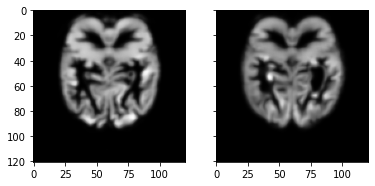

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(sitk.GetArrayViewFromImage(images_CTRL[0])[:,40,:], cmap = 'Greys_r')
ax2.imshow(sitk.GetArrayViewFromImage(images_AD[0])[:,40,:], cmap = 'Greys_r')

### **PCA application**

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

# Load Dataset

In [95]:
import pandas as pd

In [96]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
dataset_file = "/gdrive/MyDrive/cmepda_medphys_dataset/IMAGES/AD_CTRL/AD_CTRL_metadata.csv"
df = pd.read_table(dataset_file)
df.head(333)
df.shape

Mounted at /gdrive


(333, 5)

After mounting drive, we stamped the entire tab of dataset.

In [97]:
df.head(333)

,ID,DXGROUP,AGE,SEX,MMSE
0,AD-1,AD,75.25,M,23
1,AD-10,AD,71.43,M,24
2,AD-100,AD,82.41,F,23
3,AD-101,AD,87.11,F,21
4,AD-102,AD,76.01,F,26
...,...,...,...,...,...
328,CTRL-95,Normal,77.69,F,30
329,CTRL-96,Normal,74.04,F,30
330,CTRL-97,Normal,80.39,M,29
331,CTRL-98,Normal,81.68,F,29


Add a column to split ID information.

In [98]:
df['Site'] = df['ID'].apply(lambda x: x.split('_')[0])

In [99]:
df.columns

Index(['ID', 'DXGROUP', 'AGE', 'SEX', 'MMSE', 'Site'], dtype='object')

From this point we change in number all information expressed in letters.

In [100]:
df['DXGROUP'] = df.DXGROUP.apply(lambda x: '1' if x=='AD' else '-1')
df.head(333)

,ID,DXGROUP,AGE,SEX,MMSE,Site
0,AD-1,1,75.25,M,23,AD-1
1,AD-10,1,71.43,M,24,AD-10
2,AD-100,1,82.41,F,23,AD-100
3,AD-101,1,87.11,F,21,AD-101
4,AD-102,1,76.01,F,26,AD-102
...,...,...,...,...,...,...
328,CTRL-95,-1,77.69,F,30,CTRL-95
329,CTRL-96,-1,74.04,F,30,CTRL-96
330,CTRL-97,-1,80.39,M,29,CTRL-97
331,CTRL-98,-1,81.68,F,29,CTRL-98


In [101]:
df['SEX'] = df.SEX.apply(lambda x: '1' if x=='F' else '-1')
df.head(333)

,ID,DXGROUP,AGE,SEX,MMSE,Site
0,AD-1,1,75.25,-1,23,AD-1
1,AD-10,1,71.43,-1,24,AD-10
2,AD-100,1,82.41,1,23,AD-100
3,AD-101,1,87.11,1,21,AD-101
4,AD-102,1,76.01,1,26,AD-102
...,...,...,...,...,...,...
328,CTRL-95,-1,77.69,1,30,CTRL-95
329,CTRL-96,-1,74.04,1,30,CTRL-96
330,CTRL-97,-1,80.39,-1,29,CTRL-97
331,CTRL-98,-1,81.68,1,29,CTRL-98


Now, we added a column (DXGROUP_S) to simplify reading of column "DXGROUP".

In [105]:
df['DXGROUP_S'] = df.DXGROUP.apply(lambda x: 'Controls' if x=='-1' else 'ASD')
df.head(333)

,ID,DXGROUP,AGE,SEX,MMSE,Site,DXGROUP_S
0,AD-1,1,75.25,-1,23,AD-1,ASD
1,AD-10,1,71.43,-1,24,AD-10,ASD
2,AD-100,1,82.41,1,23,AD-100,ASD
3,AD-101,1,87.11,1,21,AD-101,ASD
4,AD-102,1,76.01,1,26,AD-102,ASD
...,...,...,...,...,...,...,...
328,CTRL-95,-1,77.69,1,30,CTRL-95,Controls
329,CTRL-96,-1,74.04,1,30,CTRL-96,Controls
330,CTRL-97,-1,80.39,-1,29,CTRL-97,Controls
331,CTRL-98,-1,81.68,1,29,CTRL-98,Controls


In [106]:
print(df.DXGROUP_S.unique())
print(df.DXGROUP.unique())

['ASD' 'Controls']
['1' '-1']


In [107]:
df.groupby('DXGROUP_S')['ID'].count()

DXGROUP_S
ASD         144
Controls    189
Name: ID, dtype: int64

# Standardize the Data
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

In [115]:
from sklearn.preprocessing import StandardScaler

features = ['DXGROUP', 'AGE', 'SEX', 'MMSE']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['DXGROUP_S']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# PCA Projection to 2D
The original data has 4 columns (dxgroup, age, sex, mmse). In this section, the code projects the original data which is 4 dimensional into 2 dimensions.



In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

Concatenating DataFrame along axis=1. finalDf is the final DataFrame before plotting the data.

In [117]:
finalDf = pd.concat([principalDf, df[['DXGROUP_S']]], axis = 1)

# Visalize 2D Projection

In [118]:
import matplotlib.pyplot as plt

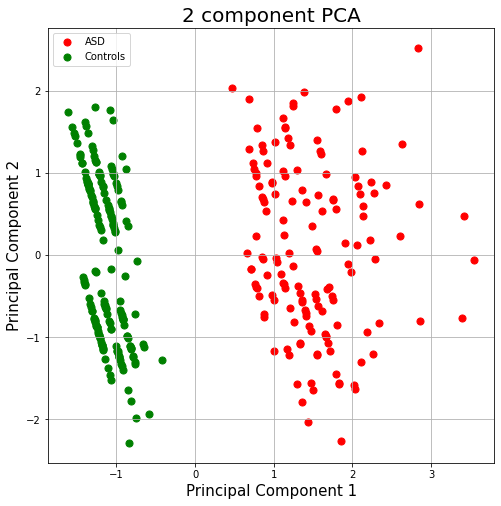

In [119]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['ASD', 'Controls']
colors = ['r', 'g']
for DXGROUP_S, color in zip(targets,colors):
    indicesToKeep = finalDf['DXGROUP_S'] == DXGROUP_S
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. 

In [120]:
pca.explained_variance_ratio_

array([0.46285374, 0.25171374])

By using the attribute explained_variance_ratio_, you can see that the first principal component contains 46.29% of the variance and the second principal component contains 25.17% of the variance. Together, the two components contain 71.46% of the information.